In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import mean_squared_error, r2_score
from numpy.linalg import norm
import joblib


In [ ]:
data = pd.read_csv(r"C:\Users\maria\Desktop\Assignment 1 ML\loan_old.csv")
data.dropna(inplace=True)
data = data.drop(["Loan_ID"],axis=1)

In [ ]:
data.head(10)

,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
1,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y
5,Male,Yes,2,Graduate,5417,4196.0,144.0,1.0,Urban,414.50,Y
6,Male,Yes,0,Not Graduate,2333,1516.0,144.0,1.0,Urban,123.99,Y
7,Male,Yes,3+,Graduate,3036,2504.0,144.0,0.0,Semiurban,209.22,N
8,Male,Yes,2,Graduate,4006,1526.0,144.0,1.0,Urban,208.81,Y
9,Male,Yes,1,Graduate,12841,10968.0,144.0,1.0,Semiurban,449.00,N
10,Male,Yes,2,Graduate,3200,700.0,144.0,1.0,Urban,126.56,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              513 non-null    object 
 1   Married             513 non-null    object 
 2   Dependents          513 non-null    object 
 3   Education           513 non-null    object 
 4   Income              513 non-null    int64  
 5   Coapplicant_Income  513 non-null    float64
 6   Loan_Tenor          513 non-null    float64
 7   Credit_History      513 non-null    float64
 8   Property_Area       513 non-null    object 
 9   Max_Loan_Amount     513 non-null    float64
 10  Loan_Status         513 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 48.1+ KB


In [ ]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64

In [ ]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    mean = data[column].mean()
    std = data[column].std()
    print(f"Column: {column}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print("------------")


Column: Income
Mean: 5030.730994152047
Standard Deviation: 4469.976642590766
------------
Column: Coapplicant_Income
Mean: 1486.6275243443274
Standard Deviation: 2102.196619596832
------------
Column: Loan_Tenor
Mean: 137.66081871345028
Standard Deviation: 23.139901552505556
------------
Column: Credit_History
Mean: 0.8557504873294347
Standard Deviation: 0.351685495324775
------------
Column: Max_Loan_Amount
Mean: 227.41440545808967
Standard Deviation: 157.63227884192304
------------


## check for numerical and categorical values

In [ ]:
nf = data.select_dtypes(include=['int', 'float'])
cf= data.select_dtypes(include=['object'])
print("numerical features: ")
print(nf.columns)
print("categorical features: ")
print(cf.columns)

numerical features: 
Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History',
       'Max_Loan_Amount'],
      dtype='object')
categorical features: 
Index(['Gender', 'Married', 'Dependents', 'Education', 'Property_Area',
       'Loan_Status'],
      dtype='object')


### Check if the numerical data has same scale or not

#### * looks like the some of the  numerical features has high standard deviation thus not at same scale

c:\Users\Essam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


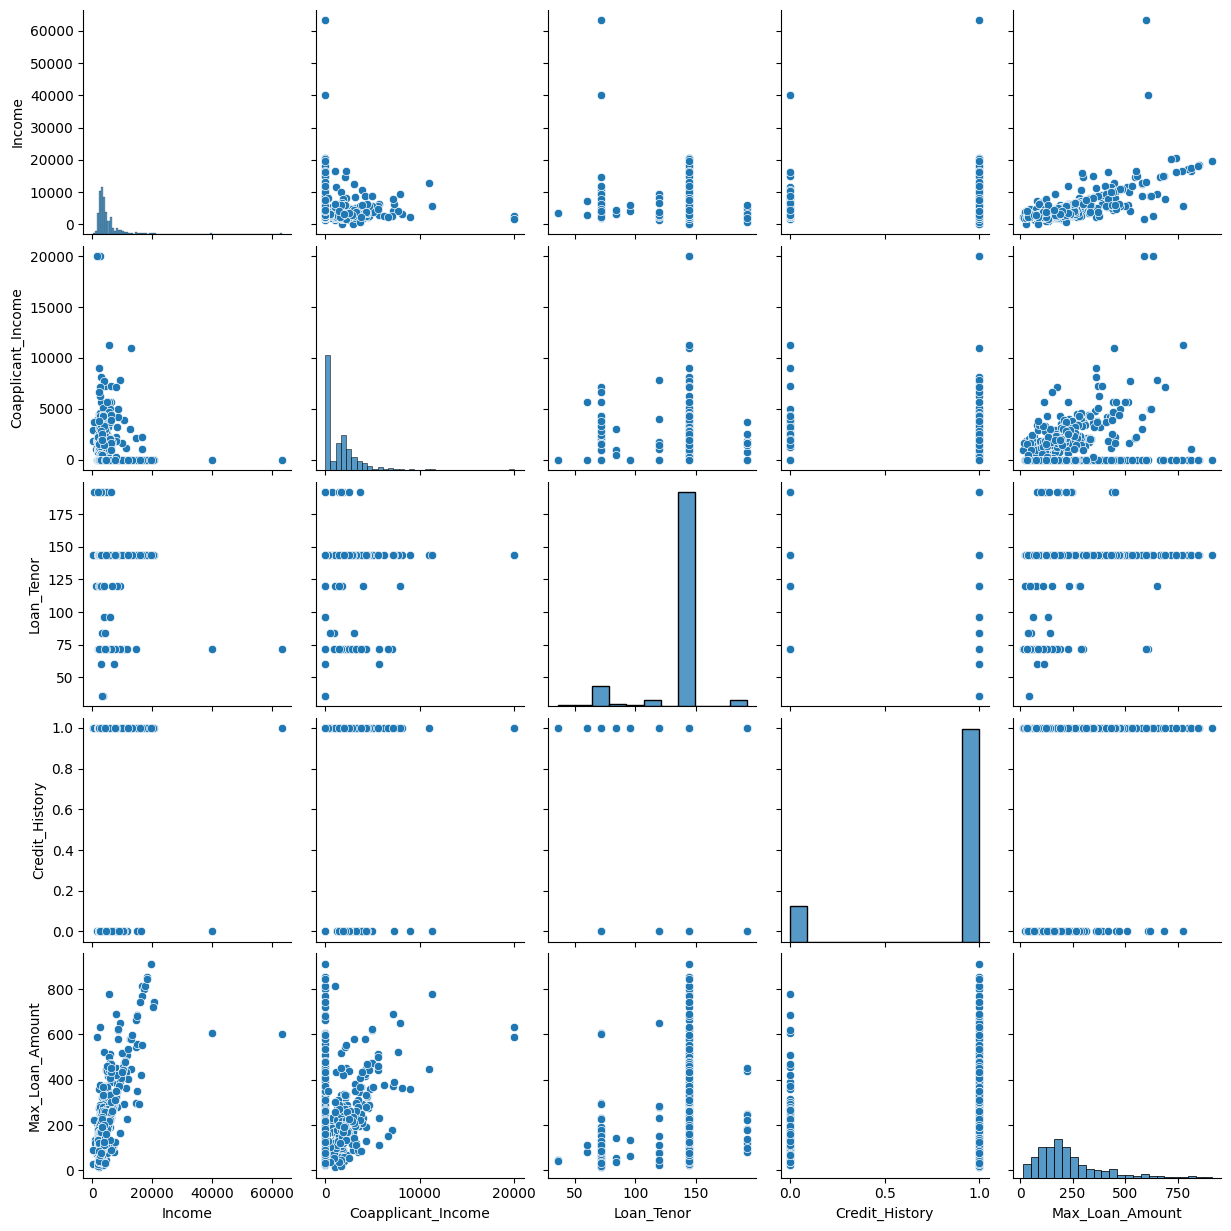

In [ ]:
sns.pairplot(nf)
plt.show()

### Records containing missing values are removed


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64

In [ ]:
# corr=data.corr()
# corr
# sns.heatmap(corr,annot=True)

#### Split the data , the features and targets are separated for logistic regresion


In [ ]:
X = data.drop(columns=["Max_Loan_Amount","Loan_Status"], axis=1)
y = data["Max_Loan_Amount"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

### Encode the categorical attributes

In [ ]:
columns_to_encode = ["Gender", "Married", "Dependents", "Education", "Loan_Tenor", "Credit_History", "Property_Area"]

for column in columns_to_encode:
    encoder = LabelEncoder()
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])



In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

### Standardize the Features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

## Regular linear regrission model

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error and R-squared for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("R-squared score:", r2)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

R-squared score: 0.04212693602124051
Train Mean Squared Error: 0.12564368348868454
Test Mean Squared Error: 0.3702009888223079


#### * Looks like we have some problem, the model cannot genaralize well , overfitting problem !!!!

## Try lasso model to reduce the overfitting


In [ ]:
# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha value for regularization

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)


# Assess the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("R-squared score (Lasso):", r2_lasso)

# Calculate Mean Squared Error for training and testing sets with Lasso Regression
train_mse_lasso = mean_squared_error(y_train, lasso_model.predict(X_train))
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Train Mean Squared Error (Lasso):", train_mse_lasso)
print("Test Mean Squared Error (Lasso):", test_mse_lasso)

joblib.dump(lasso_model, 'lasso_model_weights.pkl')


R-squared score (Lasso): 0.3219890671473171
Train Mean Squared Error (Lasso): 0.16842204623089424
Test Mean Squared Error (Lasso): 0.26203922754838466


['lasso_model_weights.pkl']

#### * Better results

# Logistic regrission

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_f(X, t, weights):
    m = X.shape[0]
    prop = sigmoid(np.dot(X, weights))
    positive = -t * np.log(prop)
    negative = - (1 - t) * np.log(1 - prop)
    cost = 1 / m * np.sum(positive + negative)
    return cost


def f_dervative(X, t, weights):
    m = X.shape[0]
    prop = sigmoid(np.dot(X, weights))
    error = prop - t
    gradient = X.T @ error / m
    return gradient


def gradient_descent(X, t, step_size=0.1, precision=0.0001, max_iter=7000):
    examples, features = X.shape
    iter = 0
    costs = []  # Move this line outside the loop
    cur_weights = np.random.rand(features)  # random starting point
    last_weights = cur_weights + 100 * precision

    # print(f'Initial Random Cost: {cost_f(X, t, cur_weights)}')

    while norm(cur_weights - last_weights) > precision and iter < max_iter:
        last_weights = cur_weights.copy()  #  copy
        gradient = f_dervative(X, t, cur_weights)
        cur_weights -= gradient * step_size
        #print(cost_f(X, cur_weights))
        iter += 1
        current_cost = cost_f(X, t, cur_weights)
        costs.append(current_cost)

    # Plot the cost over iterations
    plt.plot(range(1, iter + 1), costs, linestyle='-', color='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function vs iterations')
    plt.show()
    print(f'Total Iterations {iter}')
    print(f'Optimal Cost: {cost_f(X, t, cur_weights)}')
    return cur_weights


def accuracy(X, t, weights, threshold = 0.5):
    m = X.shape[0]
    prop = sigmoid(np.dot(X, weights))
    labels = (prop >= threshold).astype(int)
    correct = np.sum((t == labels))
    return correct / m * 100.0

In [ ]:
Xl=data.drop(["Loan_Status","Max_Loan_Amount"],axis=1)
yl=data["Loan_Status"]

In [ ]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
columns_to_encode = ["Gender", "Married", "Dependents", "Education", "Loan_Tenor", "Credit_History", "Property_Area"]

for column in columns_to_encode:
    encoder = LabelEncoder()
    X_trainl[column] = encoder.fit_transform(X_trainl[column])
    X_testl[column] = encoder.transform(X_testl[column])

encod = LabelEncoder()
y_trainl = encod.fit_transform(y_trainl)

# Transform the 'Loan_Status' column in y_test
y_testl = encod.transform(y_testl)


In [ ]:
numeric_cols = ["Income", "Coapplicant_Income"]
scale = StandardScaler()

# Fit and transform on training set
X_trainl[numeric_cols] = scale.fit_transform(X_trainl[numeric_cols])

# Use the same scaler to transform the test set
X_testl[numeric_cols] = scale.transform(X_testl[numeric_cols])

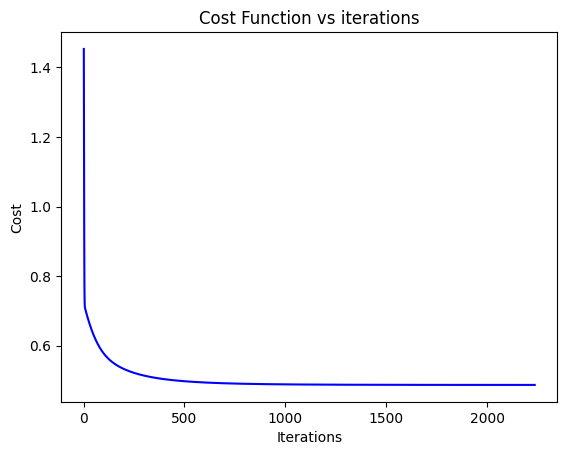

Total Iterations 2236
Optimal Cost: 0.48674880863286263
Accuracy: 80.58252427184466


In [ ]:
weights = gradient_descent(X_trainl,y_trainl)
print(f'Accuracy: {accuracy(X_testl,y_testl,weights)}')
np.save('Logistic_model_weights.npy', weights)

## Load the new data and preprocess it

In [ ]:
data_new = pd.read_csv(r"C:\Users\Essam\Desktop\Assignment 1 ML\loan_new.csv")
# Removing spaces in column name
data_new = data_new.dropna()
# Write the cleaned data to a new CSV file
data_new.to_csv(r"C:\Users\Essam\Desktop\Assignment 1 ML\cleaned_data.csv", index=False)

In [ ]:
data_new = data_new.drop(["Loan_ID"],axis=1)

In [ ]:
#encode the columns for new data on the same encoder of train data
for column in columns_to_encode:
    data_new[column] = encod.fit_transform(data_new[column])

In [ ]:
numeric_cols = ["Income", "Coapplicant_Income"]
# Fit on training set using training scale of old data
data_new[numeric_cols] = scale.transform(data_new[numeric_cols])

In [ ]:
loaded_weights = np.load('Logistic_model_weights.npy')
def predict_loan_status(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)

# Predict loan status for data_new
predicted_loan_status = predict_loan_status(data_new, loaded_weights)
predicted_loan_status

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
cleaned_data = pd.read_csv(r"C:\Users\Essam\Desktop\Assignment 1 ML\cleaned_data.csv")

# Adding the predicted values as a new column 'Loan_Status'
cleaned_data['Loan_Status'] = predicted_loan_status
cleaned_data['Loan_Status'] = cleaned_data['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')

# Save the updated data to a new CSV file
cleaned_data.to_csv(r"C:\Users\Essam\Desktop\Assignment 1 ML\cleaned_data.csv", index=False)

In [ ]:
loaded_model = joblib.load('lasso_model_weights.pkl')
predictions_lasso = loaded_model.predict(data_new)
predictions_lasso

c:\Users\Essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([ 6.82035915,  6.68300928,  6.90445161,  6.57233988,  6.75837076,
        6.46578495,  6.63373581,  6.99875522,  6.69298755,  6.55356591,
        6.59398678,  7.47521527,  6.7133983 ,  6.81498066,  6.95957247,
        6.65316948,  7.86730013,  5.63374379,  6.57292724,  5.41023628,
        6.62196403,  7.17030475,  8.33533775,  7.32840906,  5.7053817 ,
        6.49135813,  6.94573853,  6.71847141,  6.75874632,  6.65249143,
        6.55955329,  6.29650963,  6.71371626,  6.83182649,  6.78097365,
        6.88254428,  6.60968484,  6.59419627,  7.12652124,  6.61191742,
        6.64504182,  7.07356315,  6.63440959,  6.86372565,  5.7038573 ,
        6.77702681,  6.51896093,  6.68660735,  5.87449348,  6.84180913,
        5.67784137,  6.63522601,  6.977373  ,  6.74404553,  6.58406542,
        6.69553767,  6.84874135,  6.71684865,  6.58949015,  7.01784094,
        6.93504803,  6.69279768,  5.5599666 ,  6.81849189,  7.0347558 ,
        6.90340568,  6.77017472,  6.88490099,  6.94011175,  7.04

In [ ]:
cleaned_data['Max_Loan_Amount'] = np.expm1(predictions_lasso)
cleaned_data.to_csv(r"C:\Users\Essam\Desktop\Assignment 1 ML\cleaned_data.csv", index=False)